In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

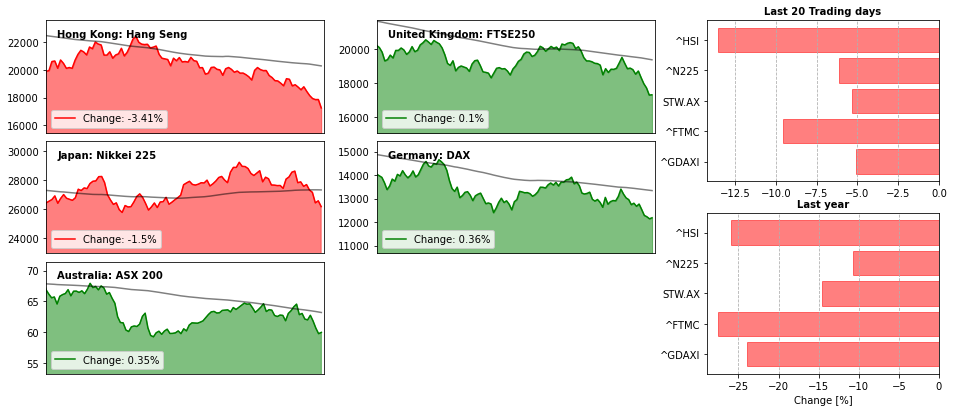

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 29-09-2022 at 08:37:22


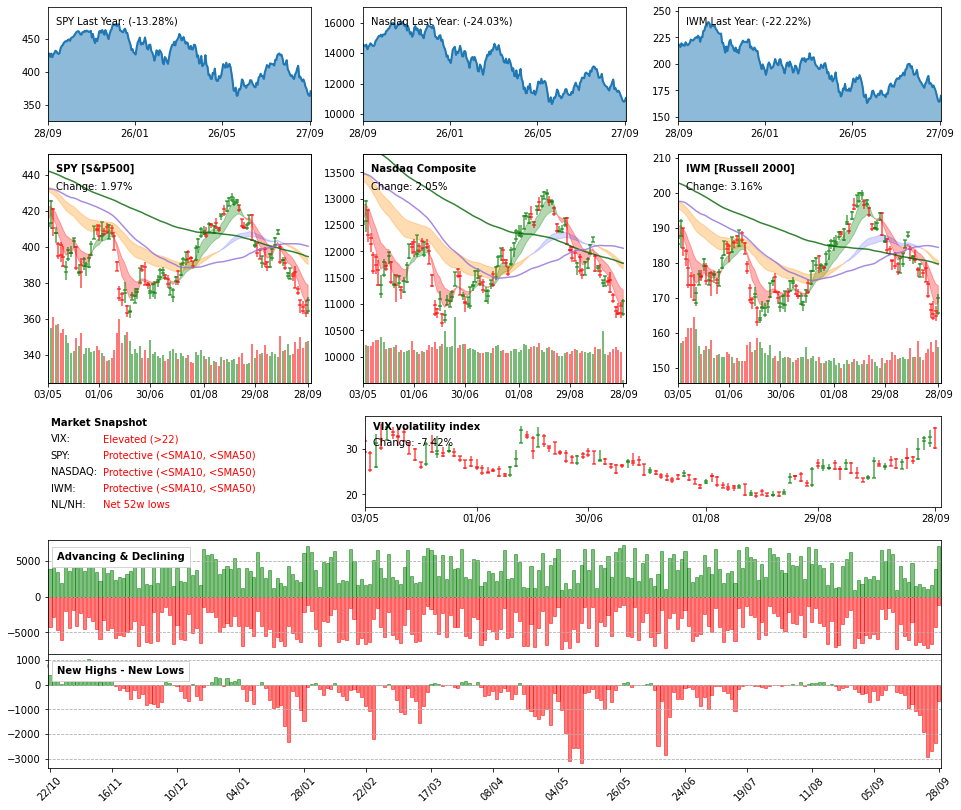

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

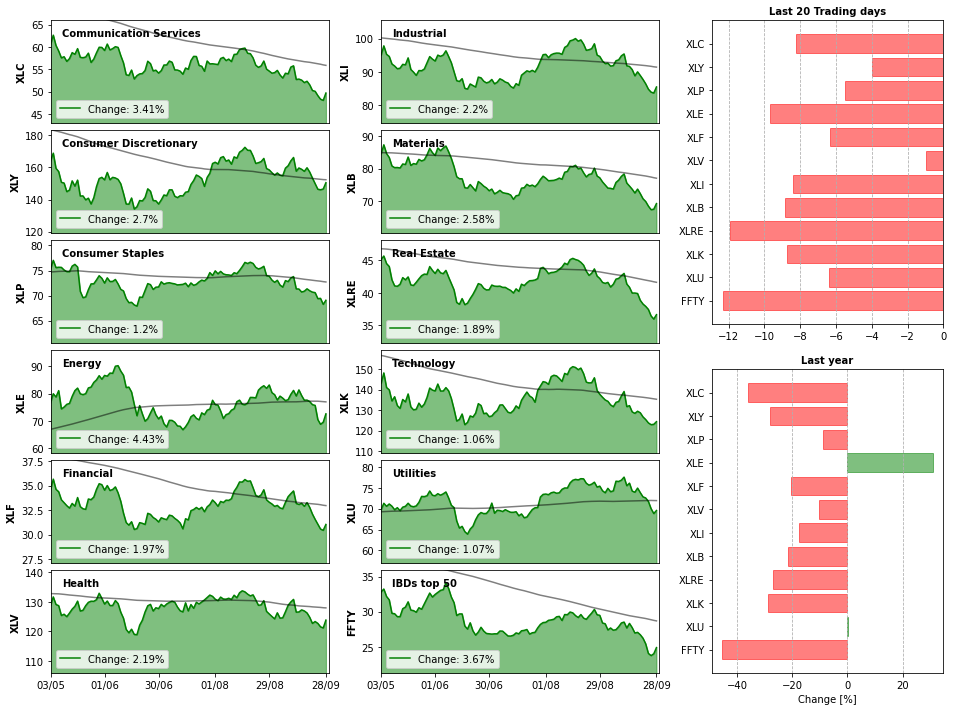

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Drug Manufacturers - General,2.72,-0.92,-7.42,6.83,1.39,2.93,3
Shell Companies,-0.18,-1.17,-5.19,3.04,1.99,0.09,-1
Insurance - Reinsurance,-0.87,-1.41,-8.11,0.98,1.29,2.52,3
Solar,-5.18,-1.46,17.89,19.81,0.79,2.61,24
Other Precious Metals & Mining,-2.46,-1.66,-39.62,-40.69,1.34,7.69,59
Discount Stores,-1.17,-2.51,-12.44,-2.52,0.79,2.08,-1
Biotechnology,1.03,-2.61,-10.84,-36.32,0.91,3.21,32
Silver,-4.01,-3.69,-40.60,-35.53,1.36,8.87,96
Healthcare Plans,-0.56,-3.75,-0.25,23.42,1.12,1.24,-6
Specialty Retail,0.15,-3.81,-13.41,-17.92,0.55,3.22,20


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Oil & Gas Equipment & Services,-5.71,-15.49,-25.52,5.70,1.11,4.20,-8
Mortgage Finance,-9.26,-15.66,-33.82,-45.58,1.16,1.49,0
Lumber & Wood Production,-2.90,-15.74,-15.26,0.82,1.21,4.64,2
Marine Shipping,-6.78,-15.76,-39.17,-26.54,1.28,0.58,4
Oil & Gas Drilling,-4.90,-16.10,-18.70,20.72,1.47,5.88,2
Integrated Freight & Logistics,-2.45,-16.12,-24.96,-17.00,1.01,1.93,-2
REIT - Industrial,-4.17,-16.16,-29.02,-11.42,1.89,1.81,-19
Steel,-3.59,-17.35,-33.14,-17.61,0.92,1.20,-9
REIT - Mortgage,-14.91,-21.86,-31.60,-39.39,2.01,1.25,-9
Aluminum,-9.25,-32.56,-58.90,-37.66,1.37,1.41,0


In [7]:
display_html(ind.prettify2(ind.volumechange())._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Volprice product
Silver,-4.01,-3.69,-40.60,-35.53,1.36,8.87,12.063200
Other Precious Metals & Mining,-2.46,-1.66,-39.62,-40.69,1.34,7.69,10.304600
Thermal Coal,5.46,-11.12,24.43,96.58,1.29,7.55,9.739500
Oil & Gas Drilling,-4.90,-16.10,-18.70,20.72,1.47,5.88,8.643600
Gold,-0.51,-3.82,-38.10,-18.04,1.35,6.33,8.545500
Oil & Gas Refining & Marketing,2.65,-9.95,7.06,32.71,1.11,6.77,7.514700
REIT - Hotel & Motel,-5.20,-11.35,-24.06,-18.32,1.61,4.14,6.665400
Home Improvement Retail,3.71,-4.40,-11.62,-13.89,1.41,4.66,6.570600
Coking Coal,3.25,-14.32,-12.13,61.66,0.91,7.19,6.542900
Residential Construction,0.98,-4.27,-14.37,-20.88,1.09,5.34,5.820600


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [8]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

IndexError: list index out of range

***
## **Crypto & Forex**

In [ ]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [ ]:
# run check

In [ ]:
# save
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0